In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("train.csv", index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

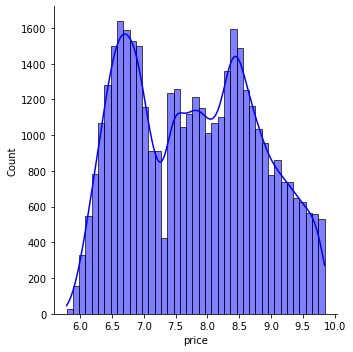

In [5]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.displot(data=df, x="price", kde=True, color="blue", alpha=0.5)
plt.show()

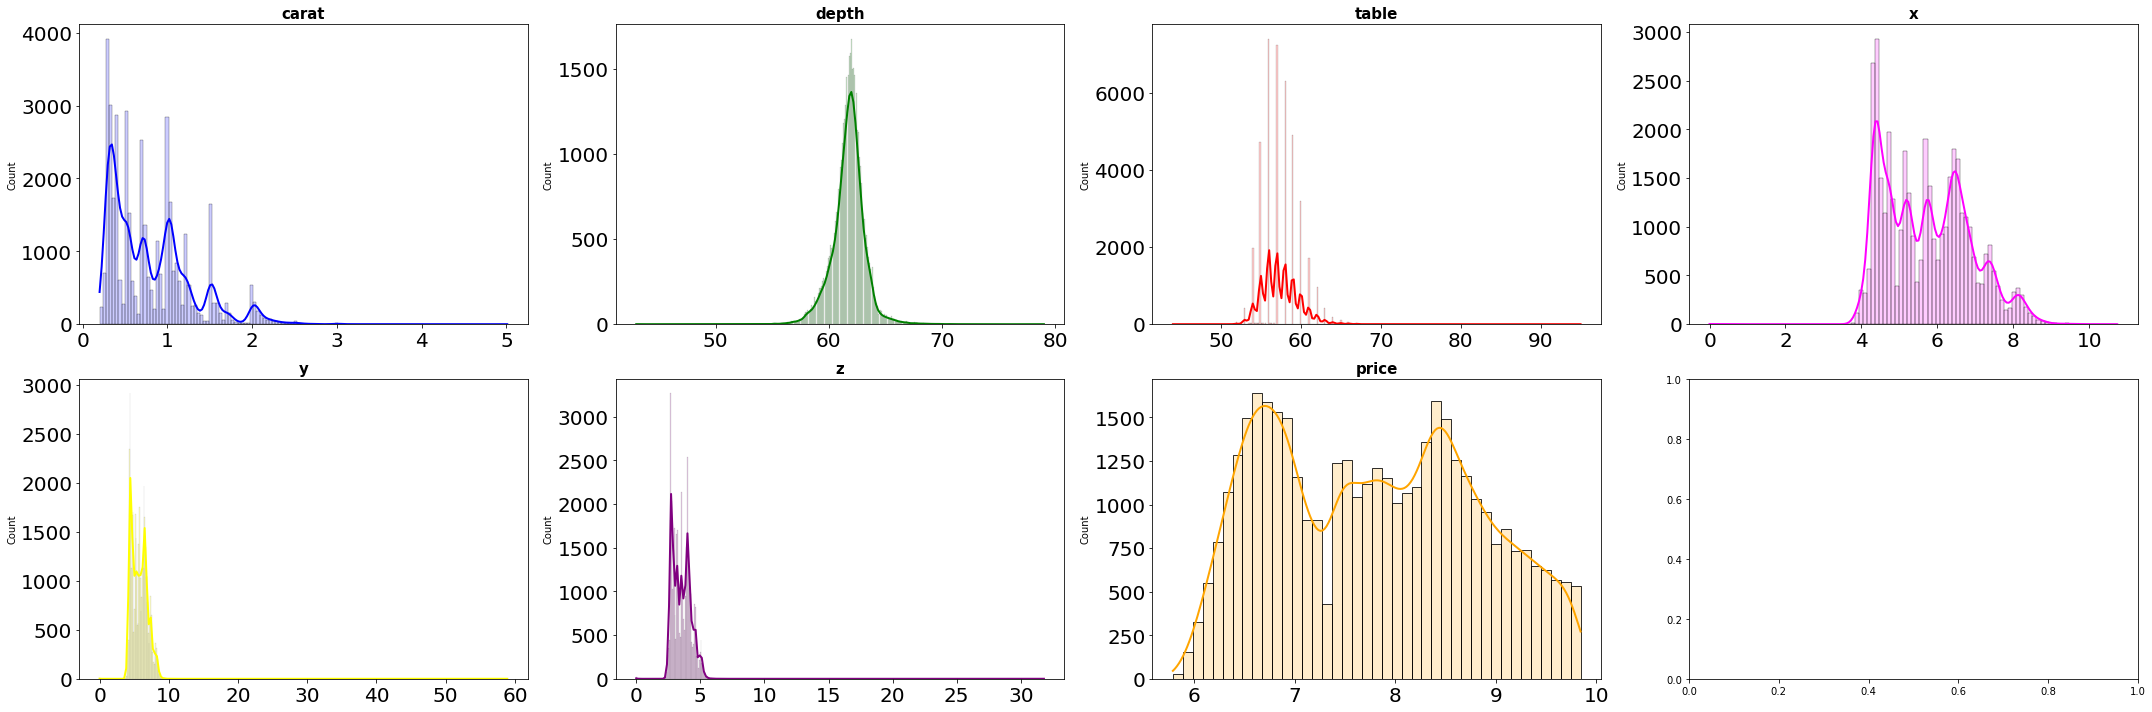

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "magenta", "yellow", "purple", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [7]:
df_numericas = df.select_dtypes(include=np.number)

In [8]:
df_numericas.head(2)

,carat,depth,table,x,y,z,price
id,,,,,,,
0,0.30,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,62.7,56.0,6.42,6.46,4.04,9.183


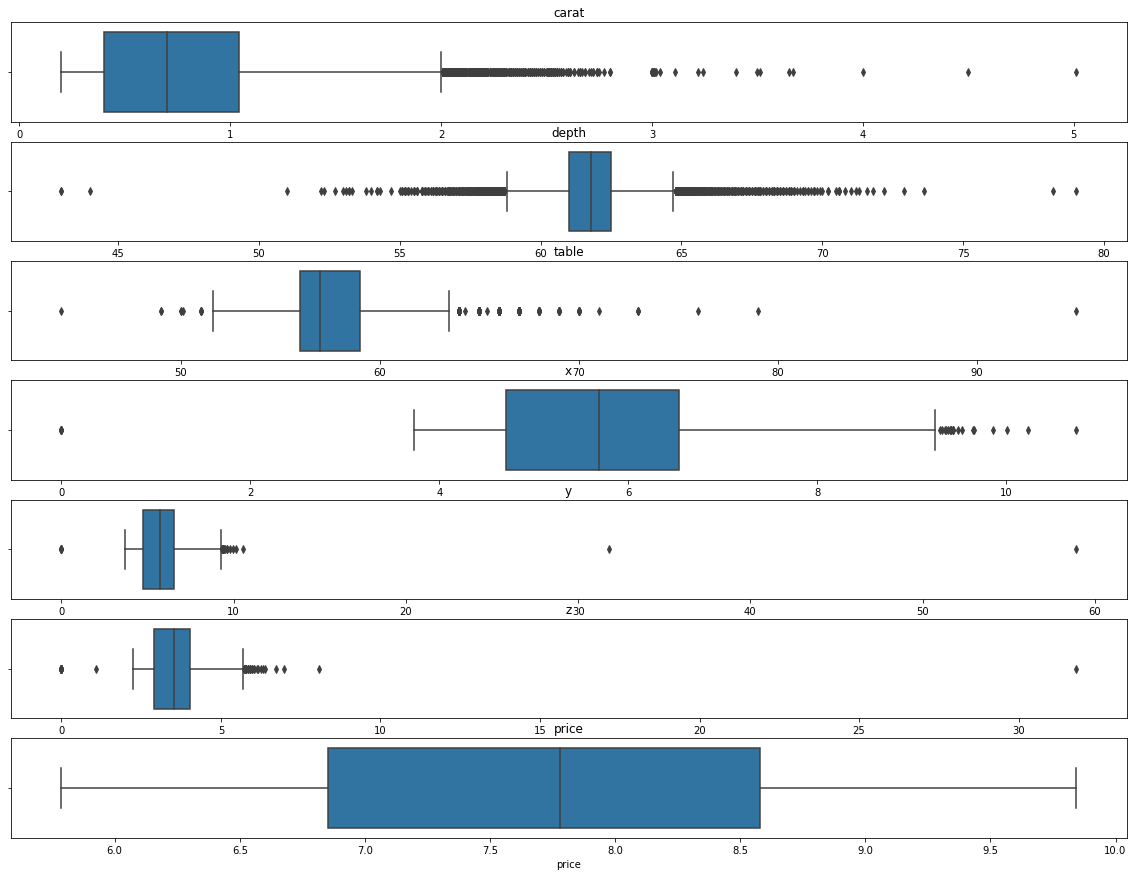

In [9]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    ax[i].set_title(df_numericas.columns[i], fontsize=12)

plt.show()

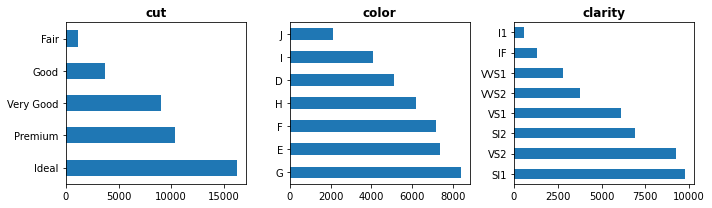

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

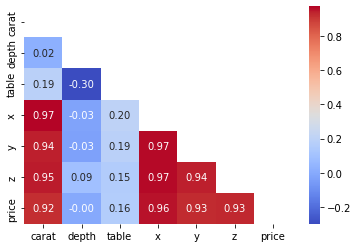

In [11]:
# calculate correlation matrix
corr_matrix = df.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', mask=mask)

# display the plot
plt.show()

In [12]:
# drop 'depth' and 'table' columns
df = df.drop(['depth', 'table'], axis=1)
df_numericas = df.select_dtypes(include=np.number)

Gestion outliers

In [13]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [14]:
lista_columnas = df_numericas.columns
lista_columnas
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1249, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 48

In [15]:
for col, outlier_idx in ind.items():
    df.iloc[outlier_idx, df.columns.get_loc(col)] = float('NaN')

In [16]:
df_numericas2 = df.select_dtypes(include = np.number)

In [17]:
imputer = IterativeImputer()
imputer.fit(df_numericas2)
imputer.transform(df_numericas2)

array([[0.3  , 4.31 , 4.28 , 2.68 , 6.353],
       [1.01 , 6.42 , 6.46 , 4.04 , 9.183],
       [0.72 , 5.71 , 5.74 , 3.54 , 7.983],
       ...,
       [0.8  , 5.86 , 5.9  , 3.69 , 7.768],
       [1.01 , 6.4  , 6.48 , 3.96 , 8.726],
       [1.3  , 7.1  , 7.14 , 4.28 , 8.771]])

In [18]:
numericas_trans = pd.DataFrame(imputer.transform(df_numericas2), columns = df_numericas2.columns)
numericas_trans.head()

,carat,x,y,z,price
0,0.30,4.31,4.28,2.68,6.353
1,1.01,6.42,6.46,4.04,9.183
2,0.72,5.71,5.74,3.54,7.983
3,1.08,6.54,6.50,4.12,8.371
4,0.36,4.50,4.55,2.82,6.588


In [19]:
columnas = numericas_trans.columns
df_num = df.drop(columnas, axis = 1)

In [20]:
df_num[columnas] = numericas_trans
df_num.head()

,cut,color,clarity,carat,x,y,z,price
id,,,,,,,,
0,Premium,D,SI2,0.30,4.31,4.28,2.68,6.353
1,Ideal,E,VVS2,1.01,6.42,6.46,4.04,9.183
2,Ideal,F,VS2,0.72,5.71,5.74,3.54,7.983
3,Very Good,G,SI2,1.08,6.54,6.50,4.12,8.371
4,Premium,G,VS1,0.36,4.50,4.55,2.82,6.588


In [21]:
df_num.isnull().sum()

cut        0
color      0
clarity    0
carat      0
x          0
y          0
z          0
price      0
dtype: int64

In [22]:
df_numericas3 = df_num.select_dtypes(include=np.number)

In [23]:
df_numericas3.head(2)

,carat,x,y,z,price
id,,,,,
0,0.30,4.31,4.28,2.68,6.353
1,1.01,6.42,6.46,4.04,9.183


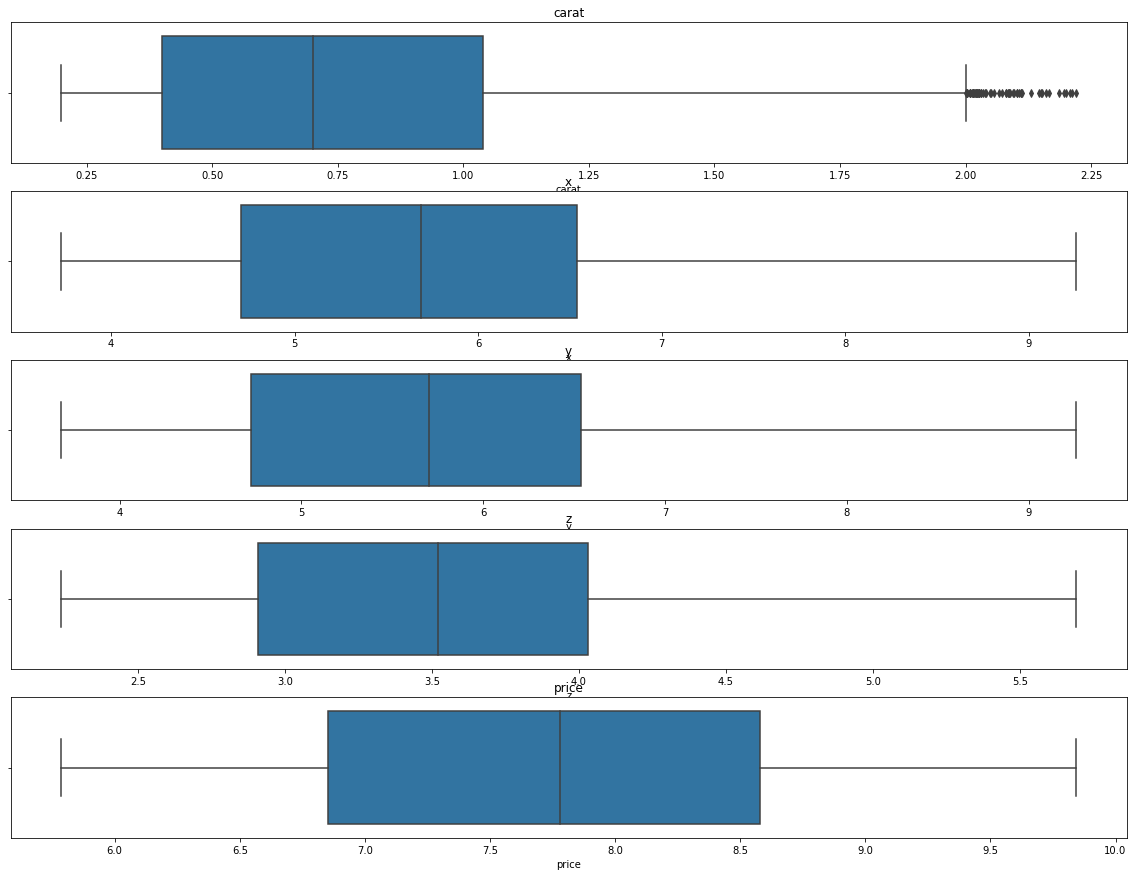

In [24]:
fig, ax = plt.subplots(5, 1, figsize=(20,15))

for i in range(len(df_numericas3.columns)):
    sns.boxplot(x=df_numericas3.columns[i], data=df_numericas3, ax=ax[i])
    ax[i].title.set_text(df_numericas3.columns[i])
    ax[i].title.set_position([.5, 1.05])

plt.show()

In [25]:
df_num.head()

,cut,color,clarity,carat,x,y,z,price
id,,,,,,,,
0,Premium,D,SI2,0.30,4.31,4.28,2.68,6.353
1,Ideal,E,VVS2,1.01,6.42,6.46,4.04,9.183
2,Ideal,F,VS2,0.72,5.71,5.74,3.54,7.983
3,Very Good,G,SI2,1.08,6.54,6.50,4.12,8.371
4,Premium,G,VS1,0.36,4.50,4.55,2.82,6.588


In [26]:
le = LabelEncoder()

In [27]:
def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [28]:
df_encoded = label_encoder(df_num, ["cut", "color", "clarity"])
df_encoded.head()

,cut,color,clarity,carat,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,,,,
0,Premium,D,SI2,0.30,4.31,4.28,2.68,6.353,3,0,3
1,Ideal,E,VVS2,1.01,6.42,6.46,4.04,9.183,2,1,7
2,Ideal,F,VS2,0.72,5.71,5.74,3.54,7.983,2,2,5
3,Very Good,G,SI2,1.08,6.54,6.50,4.12,8.371,4,3,3
4,Premium,G,VS1,0.36,4.50,4.55,2.82,6.588,3,3,4


In [29]:
df_encoded2 = df_encoded.drop(['cut', 'color', 'clarity'], axis=1)
df_encoded2.head()

,carat,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,
0,0.30,4.31,4.28,2.68,6.353,3,0,3
1,1.01,6.42,6.46,4.04,9.183,2,1,7
2,0.72,5.71,5.74,3.54,7.983,2,2,5
3,1.08,6.54,6.50,4.12,8.371,4,3,3
4,0.36,4.50,4.55,2.82,6.588,3,3,4


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

In [31]:
scaler = StandardScaler()
scaler.fit(df_encoded2[['carat', 'x', 'y', 'z']])
X_escaladas = scaler.transform(df_encoded2[['carat', 'x', 'y', 'z']])
df_encoded2[['carat', 'x', 'y', 'z']] = X_escaladas
df_encoded2.head()

,carat,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,
0,-1.101053,-1.266597,-1.304311,-1.240716,6.353,3,0,3
1,0.513877,0.616503,0.655439,0.726513,9.183,2,1,7
2,-0.145742,-0.017147,0.008182,0.003267,7.983,2,2,5
3,0.673095,0.723598,0.691398,0.842233,8.371,4,3,3
4,-0.964580,-1.097029,-1.061590,-1.038207,6.588,3,3,4


In [32]:
# guardamos el escaler en un pickle

import pickle

with open('data/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

In [33]:
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [34]:
X = df_encoded2.drop('price', axis =1)
y = df_encoded2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [35]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [36]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [37]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.6457513110645907

In [39]:
# max depth

print(regressor.tree_.max_depth)

33


In [40]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [41]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [42]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.086685,0.016463,0.12831,0.983879,test,Decission Tree I
1,0.000370,0.000032,0.00570,0.999969,train,Decission Tree I


In [43]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7, 8, 9],
        "min_samples_split": [10, 50, 100, 150, 200],
        "max_features": [1,2,3]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [44]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=9, max_features=3, min_samples_split=10)

In [46]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [47]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [48]:
df_all = pd.concat([dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.086685,0.016463,0.128310,0.983879,test,Decission Tree I
1,0.000370,0.000032,0.005700,0.999969,train,Decission Tree I
0,0.120620,0.026135,0.161663,0.974409,test,Decision tree II
1,0.115744,0.024334,0.155994,0.976535,train,Decision tree II


In [49]:
param = {"max_depth": [4, 5, 6, 7, 8, 9],
        "min_samples_split": [10, 50, 100, 150, 200],
        "max_features": [1,2,3]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [50]:
%time
bosque.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=9, max_features=3, min_samples_split=10)

In [52]:
"""for arbol in tqdm(bos.estimators_):
    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)
    plt.show()"""

'for arbol in tqdm(bos.estimators_):\n    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)\n    plt.show()'

In [53]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [54]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.098365,0.017193,0.131121,0.983165,test,Random Forest
1,0.095160,0.016163,0.127133,0.984415,train,Random Forest


In [55]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.086685,0.016463,0.128310,0.983879,test,Decission Tree I
1,0.000370,0.000032,0.005700,0.999969,train,Decission Tree I
0,0.120620,0.026135,0.161663,0.974409,test,Decision tree II
1,0.115744,0.024334,0.155994,0.976535,train,Decision tree II
0,0.098365,0.017193,0.131121,0.983165,test,Random Forest
1,0.095160,0.016163,0.127133,0.984415,train,Random Forest


In [56]:
#primer modelo
import pickle
with open('data/tercer_modelo.pkl', 'wb') as modelo:
        pickle.dump(bos, modelo)

In [57]:
#segundo modelo
import pickle
with open('data/segundo_modelo.pkl', 'wb') as modelo:
        pickle.dump(best_tree, modelo)

In [58]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,4,6,8],
         "min_samples_split": [50, 100, 150, 200],
         "max_features": [1,2,3,4], 
         "min_samples_leaf": [50, 100, 150, 200]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [50, 100, 150, 200],
                         'min_samples_split': [50, 100, 150, 200]},
             return_train_score=True, verbose=1)

In [59]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [60]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [63]:
results_gradient = metricas(y_test, y_train,y_pred_gb_test, y_pred_gb_train, "Gradient")
df_all = pd.concat([df_all, results_gradient], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.086685,0.016463,0.128310,0.983879,test,Decission Tree I
1,0.000370,0.000032,0.005700,0.999969,train,Decission Tree I
0,0.120620,0.026135,0.161663,0.974409,test,Decision tree II
1,0.115744,0.024334,0.155994,0.976535,train,Decision tree II
0,0.098365,0.017193,0.131121,0.983165,test,Random Forest
1,0.095160,0.016163,0.127133,0.984415,train,Random Forest
0,0.065213,0.008422,0.091773,0.991753,test,Gradient
1,0.061133,0.007454,0.086338,0.992812,train,Gradient


In [64]:
#segundo modelo
import pickle
with open('data/gradient.pkl', 'wb') as modelo:
        pickle.dump(grid, modelo)